In [70]:
import cutde
import numpy
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

In [71]:
tris = np.array([[[-1,0,0],[1,0,0],[0,np.sqrt(3),0]]])
centroid = np.mean(tris, axis=1)

In [114]:
x = np.linspace(-1.2, 1.2, 100)
y = np.linspace(-0.2, 1.9, 100)
z = np.array([-0.1,-1e-15,0.0,1e-15,0.1])
obsx, obsy, obsz = np.meshgrid(x,y,z)
pts = np.array([obsx, obsy, obsz]).reshape((3, -1)).T.copy()

In [115]:
disp = cutde.disp_all_pairs(pts, tris, np.array([[1, 0, 0]]), 0.25, float_dtype=np.float64)[:,0,:].reshape((*obsx.shape,3))

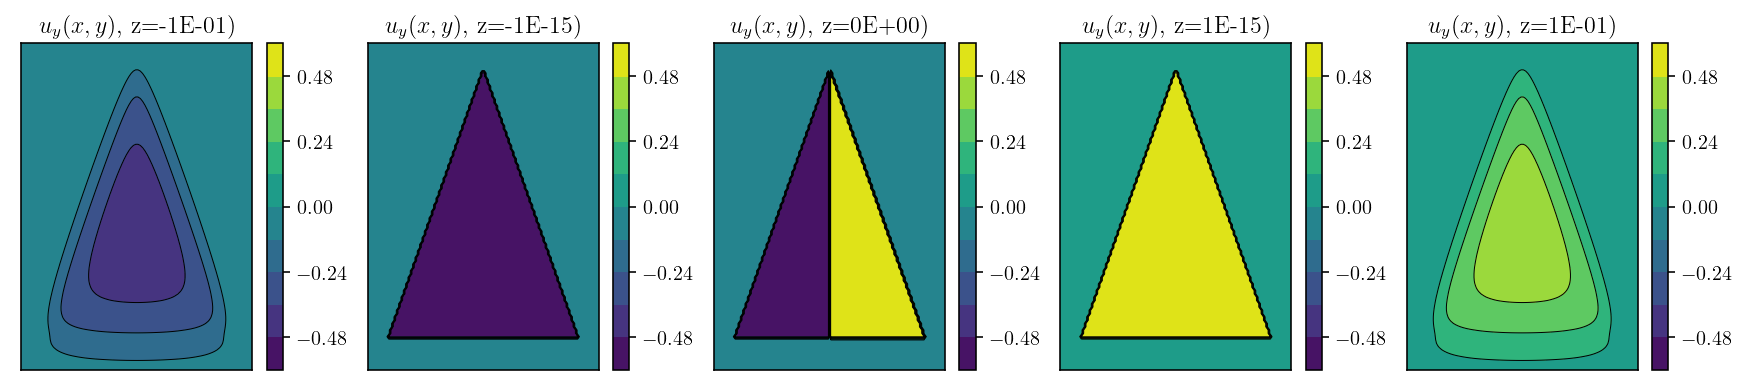

In [122]:
def plotter(idx, d):
    levels = np.linspace(-0.6,0.6,11)
    cntf = plt.contourf(obsx[:, :, idx], obsy[:, :, idx], disp[:, :, idx, d], levels=levels)
    plt.contour(obsx[:, :, idx], obsy[:, :, idx], disp[:, :, idx, d], colors="k", linestyles="-", linewidths=0.5, levels=levels)
    plt.colorbar(cntf)
    plt.title(f"$u_{['x','y','z'][d]}$")
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    
plt.figure(figsize=(15, 3))
for i in range(z.shape[0]):
    plt.subplot(1, z.shape[0], 1 + i)
    plotter(i, 1)
    plt.title(f'$u_y(x, y)$, z={obsz[0,0,i]:.0E})')
plt.show()